In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Step 1: MRI data
mri_data = [
    {'Mouse': '3X', 'Uterus_Volume': 92600, 'Cyst_Volume': 4175, 'Cysts_to_Uterus': 4.51, 'LN_Volume': 6.90},
    {'Mouse': '3R', 'Uterus_Volume': 185800, 'Cyst_Volume': 36490, 'Cysts_to_Uterus': 19.64, 'LN_Volume': 3.54},
    {'Mouse': '3L', 'Uterus_Volume': 337200, 'Cyst_Volume': 103700, 'Cysts_to_Uterus': 30.75, 'LN_Volume': 3.05},
    {'Mouse': '3RR', 'Uterus_Volume': 128300, 'Cyst_Volume': 5762, 'Cysts_to_Uterus': 4.49, 'LN_Volume': 4.58},
    {'Mouse': '4R', 'Uterus_Volume': 91940, 'Cyst_Volume': 3735, 'Cysts_to_Uterus': 4.06, 'LN_Volume': 13.82},
    {'Mouse': '4L', 'Uterus_Volume': 95500, 'Cyst_Volume': 5212, 'Cysts_to_Uterus': 5.46, 'LN_Volume': 11.89},
    {'Mouse': '4RR', 'Uterus_Volume': 137200, 'Cyst_Volume': 31300, 'Cysts_to_Uterus': 22.81, 'LN_Volume': 9.25},
    {'Mouse': '4RL', 'Uterus_Volume': 75040, 'Cyst_Volume': 500, 'Cysts_to_Uterus': 0.67, 'LN_Volume': 10.08},
]

# Step 2: Base directory and subfolder setup
base_dir = r"C:\Users\vaide\MITResearchWork\01032025_Gynepath_G2D51-20250624T155222Z-1-001"
folders = [
    'GP20250103105329',  # Uninfected: 3X, 3R, 3L, 3RR
    'GP20250103105531',
    'GP20250103111346',  # Infected: 4R, 4L, 4RR, 4RL
    'GP20250103111544'
]

# Mouse order and slot configuration
mouse_order = [
    (['3X', '3R', '3L', '3RR'], [0, 1, 2, 3]),  # uninfected slots
    (['3X', '3R', '3L', '3RR'], [0, 1, 2, 3]),
    (['4R', '4L', '4RR', '4RL'], [1, 2, 3, 4]),  # infected slots
    (['4R', '4L', '4RR', '4RL'], [1, 2, 3, 4])
]


In [20]:
# Step 3: Initialize luminescence dictionary
mouse_lumin = {mouse['Mouse']: 0 for mouse in mri_data}

# Step 4: Process luminescent.TIF images
for folder, (mice, slots) in zip(folders, mouse_order):
    image_path = os.path.join(base_dir, folder, 'luminescent.TIF')

    if not os.path.exists(image_path):
        print(f"[Warning] Missing luminescent.TIF in folder: {folder}")
        continue

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"[Error] Could not load image: {image_path}")
        continue

    height, width = img.shape
    slot_width = width // 5  # Divide into 5 equal vertical slots

    for i, slot_index in enumerate(slots):
        chunk = img[:, slot_index * slot_width : (slot_index + 1) * slot_width]
        flux = np.sum(chunk)
        mouse_lumin[mice[i]] += flux

# Step 5: Normalize utility
def normalize(values):
    values = np.array(values, dtype=np.float64)
    return (values - np.min(values)) / (np.max(values) - np.min(values))

# Step 6: Attach luminescence to MRI data
for mouse in mri_data:
    mouse['Lum'] = mouse_lumin.get(mouse['Mouse'], None)


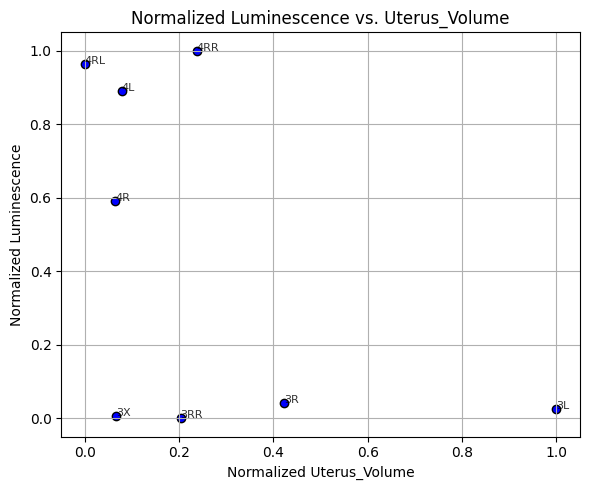

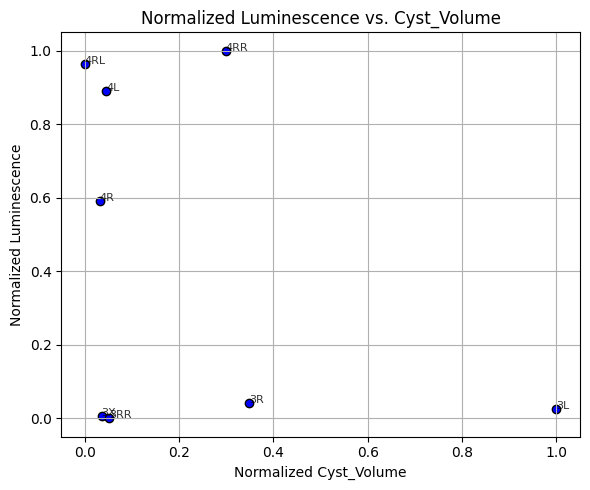

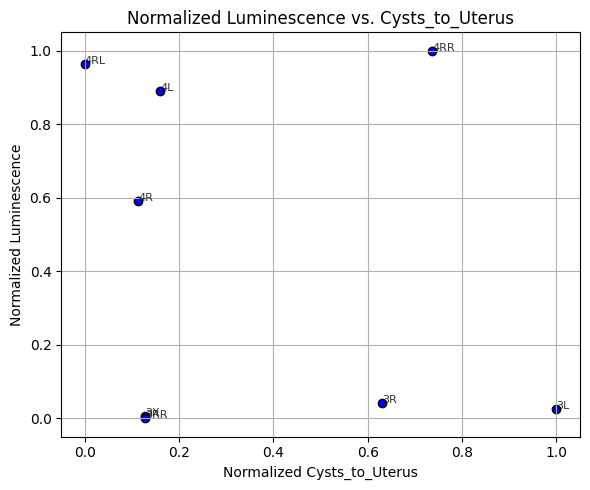

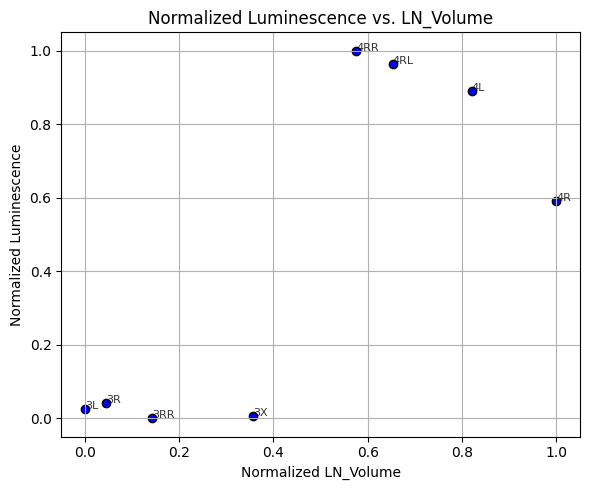

In [21]:
def plot_correlation(x_label):
    x_vals = [mouse[x_label] for mouse in mri_data]
    y_vals = [mouse['Lum'] for mouse in mri_data]

    x_norm = normalize(x_vals)
    y_norm = normalize(y_vals)

    plt.figure(figsize=(6, 5))
    plt.scatter(x_norm, y_norm, c='blue', edgecolor='black')
    plt.title(f'Normalized Luminescence vs. {x_label}')
    plt.xlabel(f'Normalized {x_label}')
    plt.ylabel('Normalized Luminescence')

    for i, mouse in enumerate(mri_data):
        plt.annotate(mouse['Mouse'], (x_norm[i], y_norm[i]), fontsize=8, alpha=0.8)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 8: Generate correlation plots
plot_correlation('Uterus_Volume')
plot_correlation('Cyst_Volume')
plot_correlation('Cysts_to_Uterus')
plot_correlation('LN_Volume')